### Q2

# IMPORTING REQUIRED PACKAGES

In [ ]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

## **DATA COLLECTION**

In [ ]:
train_path = "/content/drive/MyDrive/data/train.zip"
test_path = "/content/drive/MyDrive/data/test.zip"

files = "/content/drive/MyDrive/data"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)

with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

# DATA EXPLORATION

In [ ]:
image_dir = "/content/drive/MyDrive/data/train/"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [ ]:
data

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
...,...,...
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog


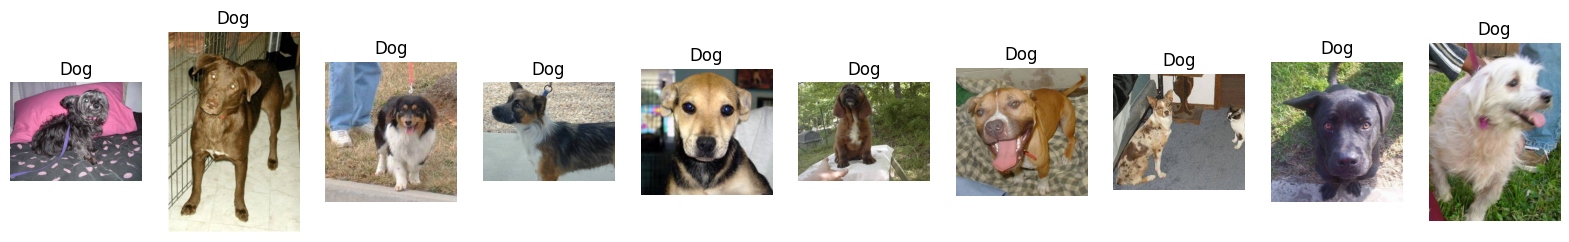

In [ ]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = '/content/drive/MyDrive/data/train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

In [ ]:
data.describe()

,filename,label
count,24988,24988
unique,24988,4
top,dog.9073.jpg,dog
freq,1,12500


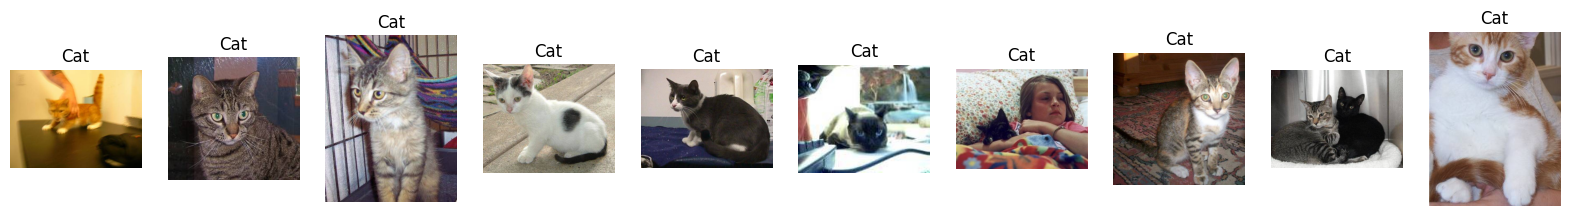

In [ ]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = '/content/drive/MyDrive/data/train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

In [ ]:
# train test split using dataframe

labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


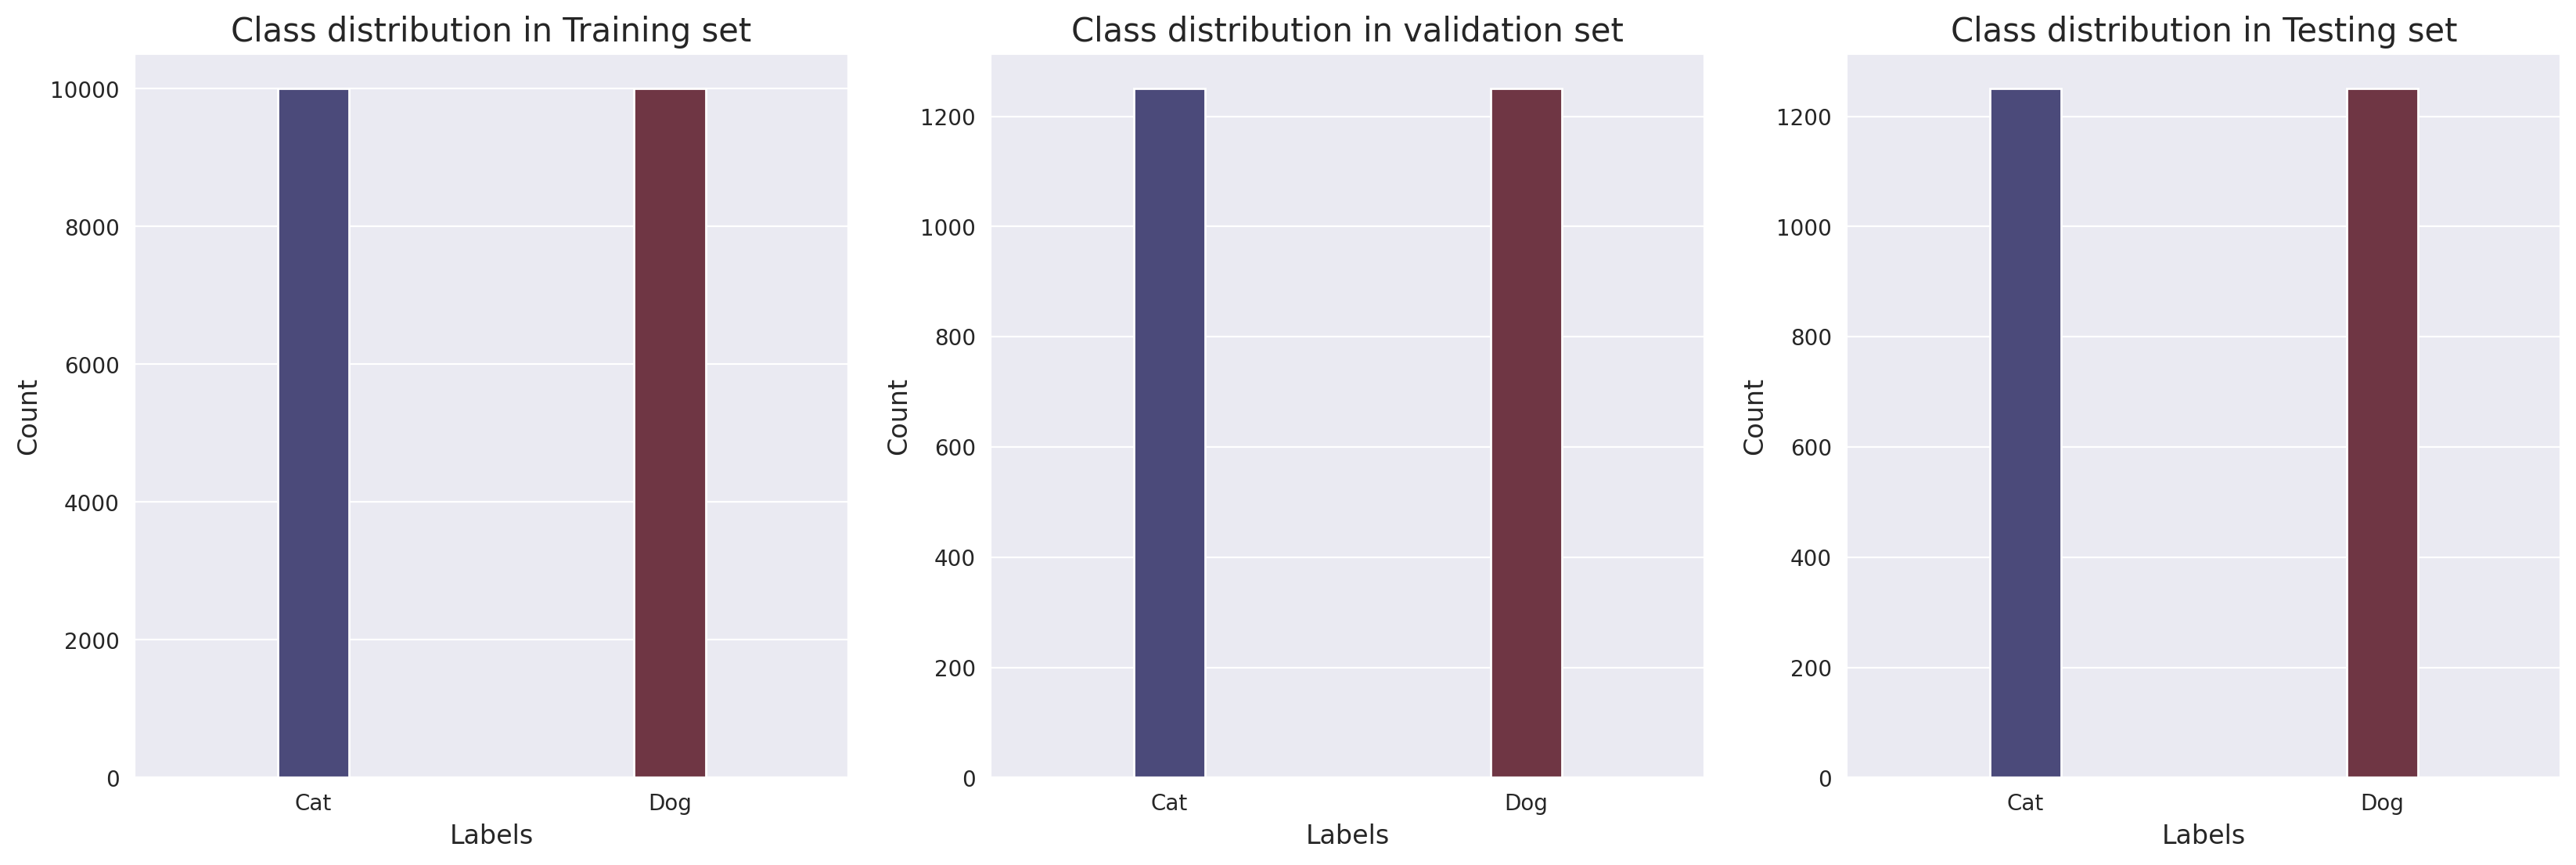

In [ ]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

In [ ]:
# create sub-directories(cats and dogs) under each sub directories(train,validation and test) created above
train_cats_dir = '/content/drive/MyDrive/cats_and_dogs_small/train/cats'
train_dogs_dir = '/content/drive/MyDrive/cats_and_dogs_small/train/dogs'

test_cats_dir = '/content/drive/MyDrive/cats_and_dogs_small/test/cats'
test_dogs_dir = '/content/drive/MyDrive/cats_and_dogs_small/test/dogs'

In [ ]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

In [ ]:
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = '/content/drive/MyDrive/data/train'
dataset_home = '/content/drive/MyDrive/cats_and_dogs_small'

for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst_dir = '/train/'
        if random() < val_ratio:
            dst_dir = '/test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)



In [ ]:
path1 = "/content/drive/MyDrive/cats_and_dogs_small/train/cats"
path2 = "/content/drive/MyDrive/cats_and_dogs_small/train/dogs"
path3 = "/content/drive/MyDrive/cats_and_dogs_small/test/cats"
path4 = "/content/drive/MyDrive/cats_and_dogs_small/test/dogs"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))

Then number of cat images in training data is 9947
Then number of dog images in training data is 9965
Then number of cat images in validation data is 2555
Then number of dog images in validation data is 2535


### **GENERATING TESTING VALIDATION DATA**

In [ ]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_small/train/',
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_small/test/',
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 19912 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


## **BUILDING THE MODEL**

In [ ]:
catVsdogs_model1 = Sequential()

# Input Layer
catVsdogs_model1.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
catVsdogs_model1.add(BatchNormalization())
catVsdogs_model1.add(MaxPooling2D(pool_size=(2,2)))
catVsdogs_model1.add(Dropout(0.2))

# Bloack 1
catVsdogs_model1.add(Conv2D(64,(3,3),activation='relu'))
catVsdogs_model1.add(BatchNormalization())
catVsdogs_model1.add(MaxPooling2D(pool_size=(2,2)))
catVsdogs_model1.add(Dropout(0.2))
# Block 2
catVsdogs_model1.add(Conv2D(128,(3,3),activation='relu'))
catVsdogs_model1.add(BatchNormalization())
catVsdogs_model1.add(MaxPooling2D(pool_size=(2,2)))
catVsdogs_model1.add(Dropout(0.2))
# Block 3
catVsdogs_model1.add(Conv2D(256,(3,3),activation='relu'))
catVsdogs_model1.add(BatchNormalization())
catVsdogs_model1.add(MaxPooling2D(pool_size=(2,2)))
catVsdogs_model1.add(Dropout(0.2))

# Fully Connected layers
catVsdogs_model1.add(Flatten())
catVsdogs_model1.add(Dense(512,activation='relu'))
catVsdogs_model1.add(BatchNormalization())
catVsdogs_model1.add(Dropout(0.2))

# Output layer
catVsdogs_model1.add(Dense(2,activation='softmax'))

# Output layer for binary classification
catVsdogs_model1.add(Dense(1, activation='sigmoid'))

catVsdogs_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 61, 61, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

In [ ]:
catVsdogs_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## **FITTING THE THE MODEL**

In [ ]:
history = catVsdogs_model1.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=30,
    callbacks=[early_stoping, learning_rate_reduction]
  )

Epoch 1/30
623/623 [==============================] - 136s 196ms/step - loss: 0.6828 - accuracy: 0.5880 - val_loss: 0.7154 - val_accuracy: 0.5310 - lr: 0.0010
Epoch 2/30
623/623 [==============================] - 122s 195ms/step - loss: 0.6484 - accuracy: 0.6426 - val_loss: 0.6427 - val_accuracy: 0.6534 - lr: 0.0010
Epoch 3/30
623/623 [==============================] - 122s 196ms/step - loss: 0.6159 - accuracy: 0.6901 - val_loss: 0.6169 - val_accuracy: 0.6876 - lr: 0.0010
Epoch 4/30
623/623 [==============================] - 122s 196ms/step - loss: 0.5957 - accuracy: 0.7101 - val_loss: 0.5550 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 5/30
623/623 [==============================] - 121s 194ms/step - loss: 0.5743 - accuracy: 0.7283 - val_loss: 0.5778 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 6/30
623/623 [==============================] - ETA: 0s - loss: 0.5578 - accuracy: 0.7393
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
623/623 [========================

## **EVALUATING AND PLOTTING MODEL PERFORMANCE**

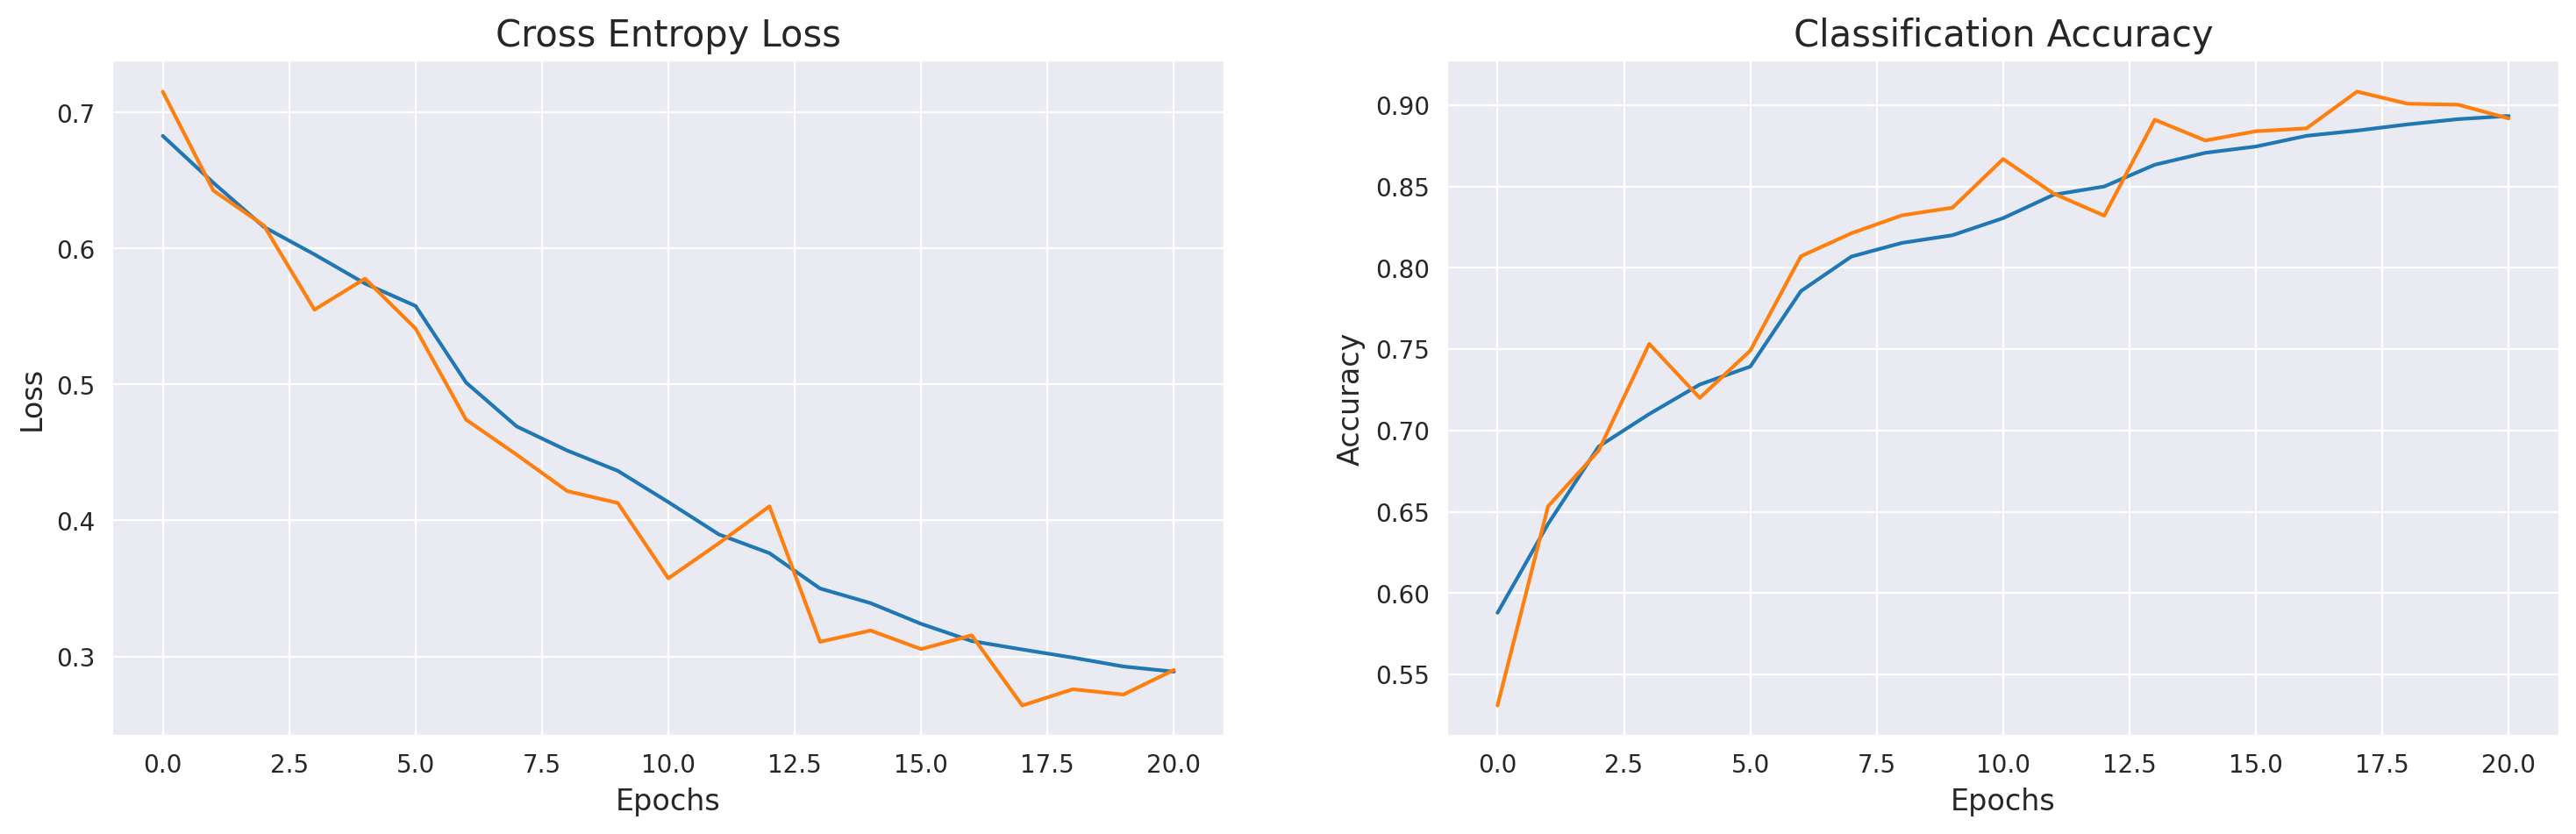

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()


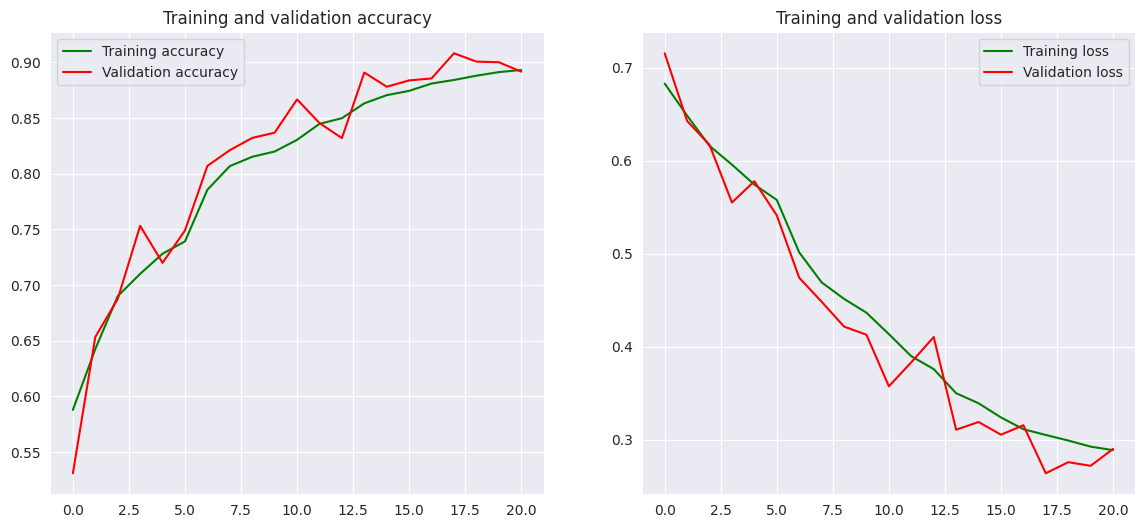

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)


In [ ]:
# Evaluvate for train generator
loss,acc = catVsdogs_model1.evaluate(train_gen,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)


The accuracy of the model for training data is: 90.52330255508423
The Loss of the model for training data is: 0.27134791016578674


In [ ]:
# prediction
result = catVsdogs_model1.predict(val_gen,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = val_gen.labels

# Evaluvate
loss,acc = catVsdogs_model1.evaluate(val_gen, batch_size = bat_size, verbose = 0)


print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for validation data is: 90.82514643669128
The Loss of the model for validation data is: 0.26395678520202637


In [ ]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.50      1.00      0.67      2555
         Dog       0.00      0.00      0.00      2535

    accuracy                           0.50      5090
   macro avg       0.25      0.50      0.33      5090
weighted avg       0.25      0.50      0.34      5090



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **GENERATING TEST DATA**

In [ ]:
size =(128,128)

# loading into dataframe
test_dir = "/content/drive/MyDrive/data/test/"
filenames = os.listdir(test_dir)
test_data = pd.DataFrame({"filename": filenames})
test_data['label'] = 'unknown'

# Create data genenerator for test data
test1_idg =  test_datagen.flow_from_dataframe(test_data,
                                     "/content/drive/MyDrive/data/test/",
                                     x_col= "filename",
                                     y_col = 'label',
                                     batch_size = bat_size,
                                     target_size=size,
                                     shuffle = False)



Found 12500 validated image filenames belonging to 1 classes.


## **PREDICTING THE TESTING DATA**

In [ ]:
# Test Prediction
test1_predict = catVsdogs_model1.predict(test1_idg,verbose = 0)

test1_predict_argmax = np.argmax(test1_predict, axis=1)

y_test_pred = test1_predict_argmax

test_data['label'] = y_test_pred


In [ ]:

# mapping
label_mapping = {0: 'cat', 1: 'dog'}
test_data['label'] = test_data['label'].map(label_mapping)
test_data.head()


,filename,label
0,1.jpg,cat
1,10.jpg,cat
2,100.jpg,cat
3,1000.jpg,cat
4,10000.jpg,cat


In [ ]:

# csv file output for submission
sample_submission = pd.read_csv('sample_submission.csv',index_col='id')
sample_submission.head()

,label
id,
1,0.5
2,0.5
3,0.5
4,0.5
5,0.5


KAGGLE SUBMISSION AND RESULT

In [ ]:

sample_submission['label'] = y_test_pred

sample_submission.to_csv('submission-Ameya.csv',index=True)

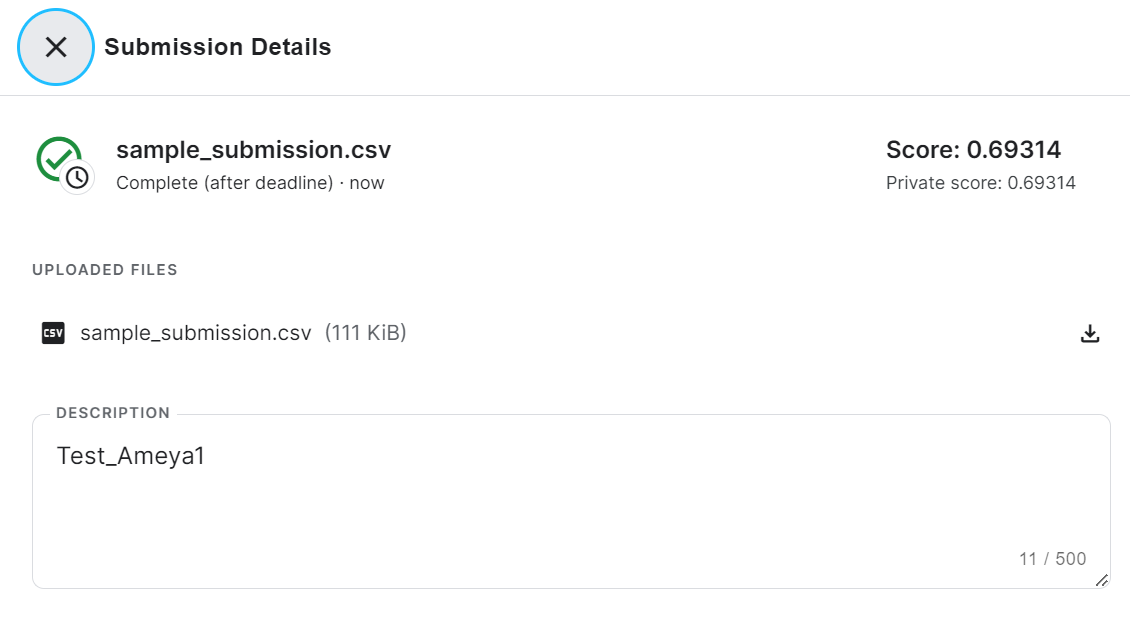

**PREDICTING THE TEST DATA**

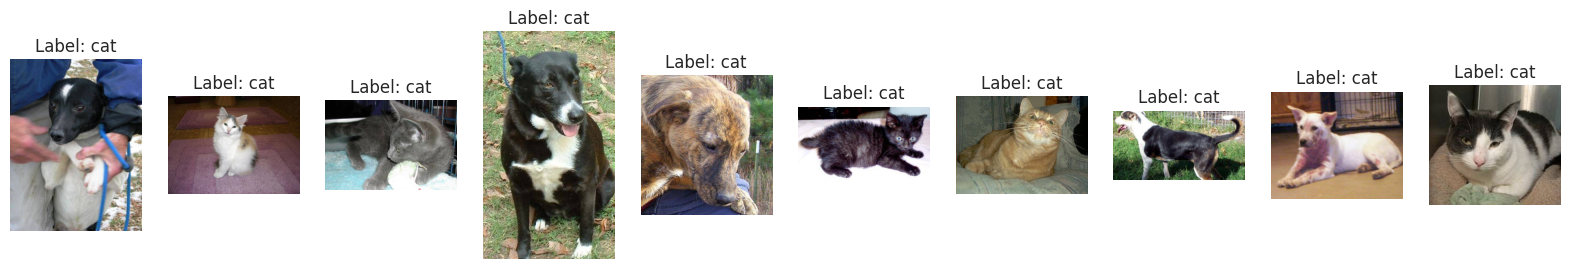

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for idx in range(10):
    image_path = os.path.join(test_dir, test_data.iloc[idx]['filename'])
    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].set_title("Label: " + test_data.iloc[idx]['label'])
    axes[idx].axis('off')
plt.show()